In [51]:
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

import matplotlib.pyplot as plt

In [52]:
# shortcuts
tfd = tfp.distributions
kernels = tfp.math.psd_kernels

# constants
num_train = 512
seed = 8888 # set random seed for reproducibility

In [71]:
def make_classification_dataset(num_samples, rate=0.5, dtype="float64", seed=seed):

    p = tfd.MixtureSameFamily(
        mixture_distribution=tfd.Categorical(probs=[0.3, 0.7]),
        components_distribution=tfd.Normal(loc=[2.0, -3.0], scale=[1.0, 0.5]))
    q = tfd.Normal(loc=0.0, scale=2.0)

    num_p = int(num_samples * rate)
    num_q = num_samples - num_p

    X_p = p.sample(sample_shape=(num_p, 1), seed=seed).numpy()
    X_q = q.sample(sample_shape=(num_q, 1), seed=seed).numpy()

    X = np.vstack([X_p, X_q]).astype(dtype)
    y = np.hstack([np.ones(num_p), np.zeros(num_q)]).astype(dtype)

    return X, y

In [74]:
X, y = make_classification_dataset(num_train)

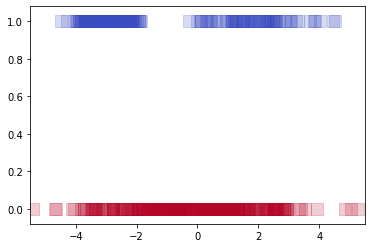

In [75]:
fig, ax = plt.subplots()

ax.scatter(X, y, c=y, s=12.**2, 
           marker='s', alpha=.2, cmap='coolwarm_r')
ax.set_xlim(-5.5, 5.5)

plt.show()